# Gaussian mix prediction experiment

student: Isabelle Melo

This experiment aims to predict a Gaussian mix distribution through two different estimation methods: Histogram and Gaussian Kernel.

## Importing bibs

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as ss
from scipy import stats

## Gaussian mix function

A Gaussian mix is just a way to write multimodal distribuition in terms of a unimodal Gaussian. We consider a superposition of K Gaussian densities of the form:

$p(x) = \sum_{k=1}^{K} \pi_{k} N(x, \mu_{k}, \Sigma_{k})$

Where $\pi_{k}$ represents the weights of mixture, $N$ the Normal distribuiton, $\mu_{k}$ the mean of k-esim Gaussian and $\Sigma_{k}$ the k-esim covariance matrix. If we have an univariate case, covariance matrix becomes just variance. Here I defined a mix of 2 gaussians with  2 means and 2 variances. The weights have been set to 1/2.

In [ ]:
def gaussian_mix(x):
    return 0.5 * np.exp(-(x - mean1) ** 2 / (2 * var1 ** 2)) * (1/(2*np.pi * (var1**2))) + 0.5 * np.exp(-(x - mean2) ** 2 / (2 * var2 ** 2))* (1/(2*np.pi * (var2**2)))

## Plotting distribuiton

You can set means\var values randomly. I just choose them to be (4.5,1) (2,0.5) for better visualizarion.

In [57]:
mean1 = 4.5; var1 = 1; mean2 = 2; var2 = 0.5

define a range to plot your distribuition

Now, I want to define a sample of 50 elements normally generated so I can try to estimate the Gaussian mix distribuiton

In [58]:
x = np.arange(0,8,0.1)

amostra = np.concatenate((np.random.normal(mean1, var1, 25),np.random.normal(mean2, var2, 25)))

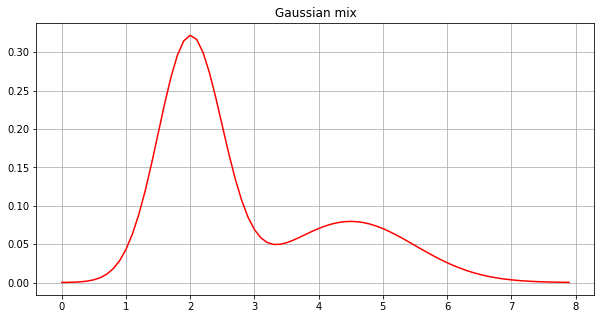

In [74]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x,gaussian_mix(x), 'red')
plt.title('Gaussian mix')
plt.grid(True)

Now it's time to apply the estimation methods

## Hisotgram method

Histogram method is a non-parametric method to approach density estimation. We consider a continuous variable $x$. To try to estimate this model, we can generate this variable within a sample, and define sample's distribution just how you want. Then we partition $x$ into equally sized bins (they don't have to be equally sized, but in this case we simplify like this so sns.histplot can be used), and count the number $n_{i}$ of observations of $x$ falling in the bin $i$. We can set probability values for each bin (corresponding y-axis):

$p_{i} = \dfrac{n_{i}}{N \Delta}$

Where N is the total number of observations. It is used for normalizing the histogram. Seaborn has a library that implements this function and plots the normalized histogram. We just have to set bin width. Let's test it for different bin width values and see wich one predicts better.

bin width 0.04

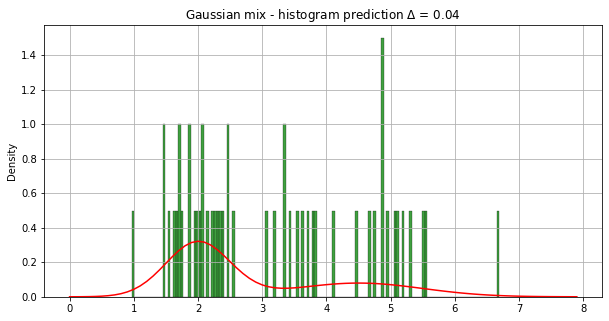

In [60]:
plt.plot(x,gaussian_mix(x), 'red')
sns.histplot(amostra, kde=False, stat = 'density', binwidth=0.04, color = 'green')
plt.title(f'Gaussian mix - histogram prediction $\Delta$ = {0.04}')
plt.grid(True)

This width seems a very low value considering the histogram cannot represent well our red distribuition

bin width 0.08

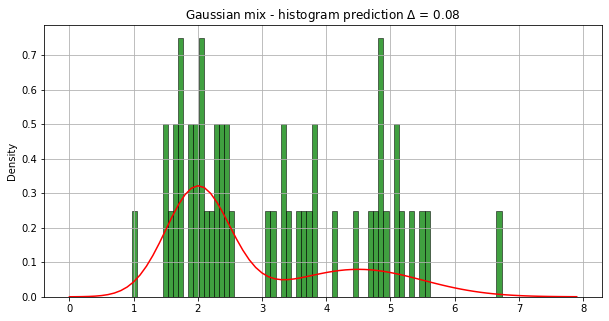

In [59]:
plt.plot(x,gaussian_mix(x), 'red')
sns.histplot(amostra, kde=False, stat = 'density', binwidth=0.08, color = 'green')
plt.title(f'Gaussian mix - histogram prediction $\Delta$ = {0.08}')
plt.grid(True)

Seems like we're getting a better result, but still not good enough.

bin width 0.25

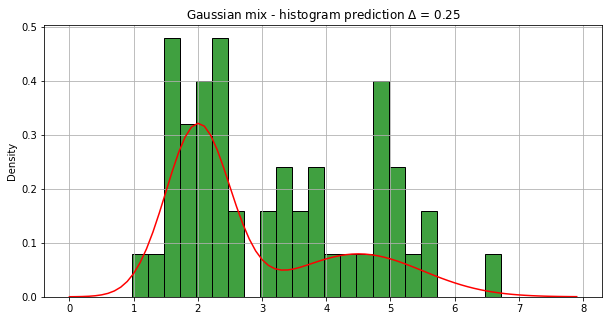

In [61]:
plt.plot(x,gaussian_mix(x), 'red')
sns.histplot(amostra, kde=False, stat = 'density', binwidth=0.25, color = 'green')
plt.title(f'Gaussian mix - histogram prediction $\Delta$ = {0.25}')
plt.grid(True)

0.25 seems a reasonable value for prediction. We can see that it's still not a perfect matching, and we can't expect it to be either.

bin width 0.45

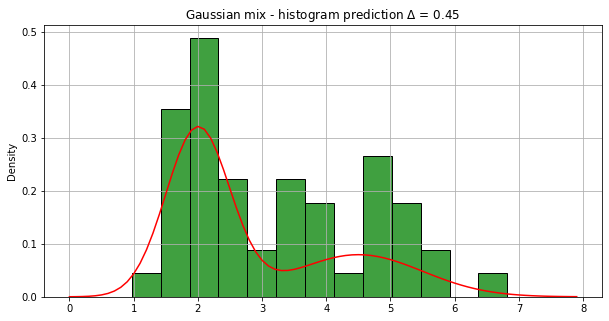

In [62]:
plt.plot(x,gaussian_mix(x), 'red')
sns.histplot(amostra, kde=False, stat = 'density', binwidth=0.45, color = 'green')
plt.title(f'Gaussian mix - histogram prediction $\Delta$ = {0.45}')
plt.grid(True)

That's also a quite good result

bin width 0.85

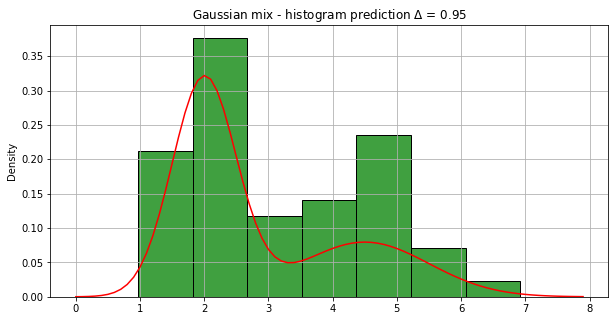

In [75]:
plt.plot(x,gaussian_mix(x), 'red')
sns.histplot(amostra, kde=False, stat = 'density', binwidth=0.85, color = 'green')
plt.title(f'Gaussian mix - histogram prediction $\Delta$ = {0.95}')
plt.grid(True)

Result starts getting way too generic for high values of bin width. We can't say bin width = 0.85 is a bad result, but we can wee that the more large is your bin width, more generic is your estimation. Is $\Delta$ is very small, we have a very spiky density, otherwise, if we have $\Delta$ a high value, we have a too smooth density. We can set best results to be intermediate values of $\Delta$, working like the tradeoff between bias-variance.

## Kernel density method

In kernel methods we can model the density as a smooth function choosen the way we want. If we choose a Gaussian kernel, the kernel density model can be obtained by:

$p(x) = \dfrac{1}{N} \sum_{n=1}^{N} \dfrac{1}{(2 \pi h^{2})^{D/2}} exp(- \dfrac{\lVert  x - x_{n}  \rVert^{2}}{2h^{2}})$

Where $x$ is your data variable, $x_{n}$ is a data point (we sample it with N data points, as you can se above), $D$ is the dimension of space ($x$ has D dimensions) and $h$ is a smoothing parameter which we might vary between values 0.0005, 0.007, 0.2. We can check the trade-off between between sensitivy to noise at small $h$ and over-smoothing at large $h$.

To do kernel estimation, we can use seaborn function sns.kdeplot and set bw_adjust parameter as $h$. Let's first try it to $h = 0.0005$

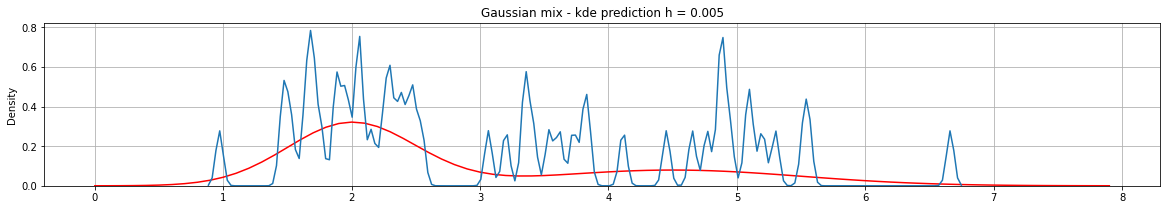

In [77]:
plt.plot(x,gaussian_mix(x), 'red')
sns.kdeplot(data=gaussian_mix(amostra), x=amostra, bw_method = 4, bw_adjust= 0.005)
plt.title(f'Gaussian mix - kde prediction h = {0.005}')
plt.rcParams["figure.figsize"] = (20,3)
plt.grid(True)

As we can see, estimation is very noisy.

Let's try now $h = 0.07$

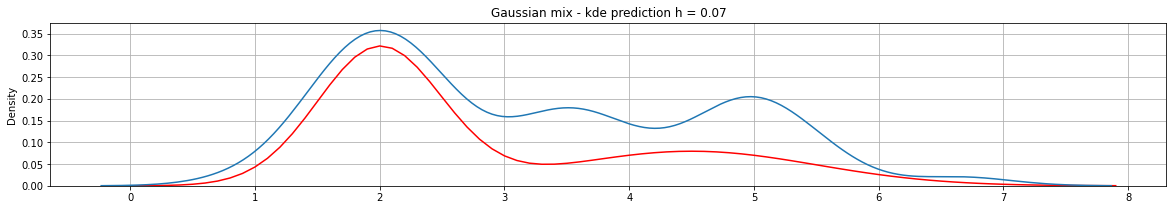

In [82]:
plt.plot(x,gaussian_mix(x), 'red')
sns.kdeplot(data=gaussian_mix(amostra), x=amostra,bw_method = 4, bw_adjust= 0.07)
plt.title(f'Gaussian mix - kde prediction h = {0.07}')
plt.rcParams["figure.figsize"] = (20,3)
plt.grid(True)

This time estimation seems better! Not very noisy, but also not a perfect estimation. What happens if we set $h$ to be 0.2?

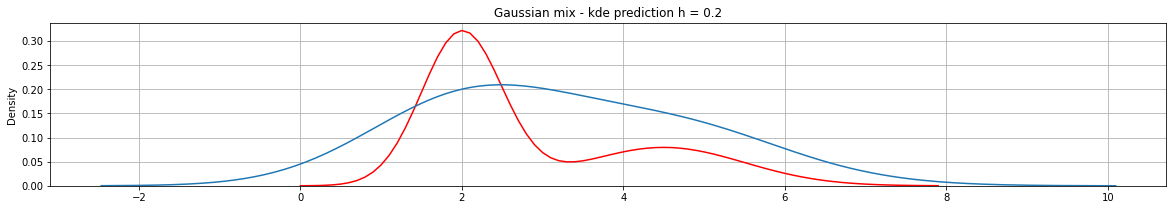

In [79]:
plt.plot(x,gaussian_mix(x), 'red')
sns.kdeplot(data=gaussian_mix(amostra), x=amostra, bw_method = 4, bw_adjust= 0.2)
plt.title(f'Gaussian mix - kde prediction h = {0.2}')
plt.rcParams["figure.figsize"] = (20,3)
plt.grid(True)

This time the model is too generalist, and it leads us to confirm just what I've said before: if $h$ is set to be very small, the result is noisy and we can compare it to an overfitting, otherwise if $h$ is high, the model generalizes too much, and it's compared to underfitting. Intermediate values define the best density model for kernel estimation.

## References

[1] Christopher M. Bishop, Pattern Recognition and machine learning